In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Lars
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile


from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier

from sklearn import tree

from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from brew.base import Ensemble
from brew.base import EnsembleClassifier
from brew.combination.combiner import Combiner


# from sklearn.model_selection import KFold

from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error


from sklearn import svm, datasets


%matplotlib inline

/Users/roshanbal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def load_data(filename, skiprows = 1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=' ')

In [2]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    maximum tree depth parameters in the vector max_depth, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        max_depth: a (T, ) vector of all the max_depth stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    test_err = []
    
    for max_d in max_depth:
        clf.max_depth = max_d
        
        clf.fit(X_train, y_train)
        
        #y_test = clf.predict()
        
        training_predictions = clf.predict(X_train)
        test_predictions = clf.predict(X_test)
        
        train_err.append(1 - accuracy_score(y_train, training_predictions))
        #test_err.append(1- accuracy_score(y_test, test_predictions))
        
        
    
    return train_err

In [5]:
training_data = np.array(load_data("training_data.txt", skiprows = 1))

y_train = training_data[:, 0]
X_train = training_data[:, 1:]

In [60]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X_train, y_train, random_state=0, test_size=.25)

n_estimators = 1000

clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

clf.max_depth = 20


select = SelectPercentile(percentile=80)
select.fit(X_tr, y_tr)
X_train_selected = select.transform(X_tr)


clf.fit(X_train_selected, y_tr)


training_predictions = clf.predict(X_train_selected)
training_error = 1 - accuracy_score(y_tr, training_predictions)

In [61]:
print(training_error)

0.09953333333333336


In [62]:
X_test_selected = select.transform(X_tst)
test_predictions = clf.predict(X_test_selected)
test_error = 1 - accuracy_score(y_tst, test_predictions)

In [63]:
print(test_error)

0.18779999999999997


In [52]:
max_depth = np.arange(2, 21)

clf = tree.DecisionTreeClassifier(criterion='gini')

select = SelectPercentile(percentile=40)
select.fit(X_tr, y_tr)
X_train_selected = select.transform(X_tr)


clf.fit(X_train_selected, y_tr)

  
y_pred = np.sign(clf.predict(X_train_selected))
binarytrain_error = (y_pred!=y_tr).sum()
binarytrain_error/15000

X_test_selected = select.transform(X_tst)

y_test_prediction = np.sign(clf.predict(X_test_selected))
binarytest_error = (y_test_prediction!=y_tst).sum()



binarytest_error/5000

0.278

In [53]:
print(binarytest_error/5000)

0.278


In [54]:
print(binarytrain_error/15000)

0.00013333333333333334


In [64]:
def classification_err(y, real_y):
    """
    This function returns the classification error between two equally-sized vectors of 
    labels; this is the fraction of samples for which the labels differ.
    
    Inputs:
        y: (N, ) shaped array of predicted labels
        real_y: (N, ) shaped array of true labels
    Output:
        Scalar classification error
    """
    return sk.accuracy_score(real_y, y)

def eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    test_err = []
    
    for min_leaf in min_samples_leaf:
        clf.min_samples_leaf = min_leaf
        
        clf.fit(X_train, y_train)
        
        
        
        training_predictions = clf.predict(X_train)
        test_predictions = clf.predict(X_test)
        
        train_err.append(1 - accuracy_score(y_train, training_predictions))
        test_err.append(1- accuracy_score(y_test, test_predictions))
        
        
    
    return train_err, test_err

In [67]:
clf = tree.DecisionTreeClassifier(criterion='gini')

select = SelectPercentile(percentile=60)
select.fit(X_tr, y_tr)
X_train_selected = select.transform(X_tr)

min_samples_leaf = [1,2,3,4,5]


X_test_selected = select.transform(X_tst)

eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train_selected, y_tr, X_test_selected, y_tst)

([0.00019999999999997797,
  0.054400000000000004,
  0.09199999999999997,
  0.12146666666666661,
  0.1368666666666667],
 [0.2782, 0.2692, 0.266, 0.26739999999999997, 0.26060000000000005])

In [94]:
clf = tree.DecisionTreeClassifier(criterion='gini')

select = SelectPercentile(percentile=20)
select.fit(X_tr, y_tr)
X_train_selected = select.transform(X_tr)

min_samples_leaf = [20,21,22,23,24,25]


X_test_selected = select.transform(X_tst)

tr_e, tst_e = eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train_selected, y_tr, X_test_selected, y_tst)



In [95]:
print(min(tst_e))

0.23099999999999998


In [120]:
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')
select = SelectPercentile(percentile=80)
select.fit(X_tr, y_tr)
X_train_selected = select.transform(X_tr)
min_samples_leaf = [1]
X_test_selected = select.transform(X_tst)
train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train_selected, 
                                                        y_tr, X_test_selected, y_tst)

In [119]:
val, idx = min((val, idx) for (idx, val) in enumerate(test_err))

print(val,idx)
print(train_err)
print(test_err)

0.16859999999999997 0
[6.666666666665932e-05, 0.02726666666666666, 0.05800000000000005, 0.08153333333333335, 0.09806666666666664, 0.11099999999999999, 0.1196666666666667, 0.12673333333333336, 0.13293333333333335, 0.1358666666666667, 0.14213333333333333, 0.1448666666666667, 0.14833333333333332, 0.1515333333333333, 0.15326666666666666, 0.1565333333333333, 0.1570666666666667, 0.1594, 0.1608666666666667, 0.16213333333333335, 0.1630666666666667, 0.1654, 0.1670666666666667, 0.16913333333333336, 0.16986666666666672]
[0.16859999999999997, 0.17220000000000002, 0.17359999999999998, 0.17520000000000002, 0.17659999999999998, 0.17859999999999998, 0.18020000000000003, 0.1814, 0.18279999999999996, 0.18500000000000005, 0.18279999999999996, 0.18479999999999996, 0.18400000000000005, 0.1854, 0.1844, 0.18779999999999997, 0.1874, 0.1884, 0.18820000000000003, 0.1884, 0.18720000000000003, 0.18879999999999997, 0.18779999999999997, 0.19179999999999997, 0.1884]


In [111]:
decision_tree_training_errors = []

decision_tree_test_errors = []


for i in range(10,110,10):
    clf = tree.DecisionTreeClassifier(criterion='gini')
    select = SelectPercentile(percentile=i)

    select.fit(X_tr, y_tr)
    X_train_selected = select.transform(X_tr)

    X_test_selected = select.transform(X_tst)


    min_samples_leaf = [18]

    train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train_selected, 
                                                            y_tr, X_test_selected, y_tst)
    decision_tree_training_errors.append(train_err)
    decision_tree_test_errors.append(test_err)


In [112]:
print(min(test_err))

val, idx = min((val, idx) for (idx, val) in enumerate(my_list))

[[0.2158], [0.20806666666666662], [0.2064666666666667], [0.20506666666666662], [0.2029333333333333], [0.20246666666666668], [0.20240000000000002], [0.2019333333333333], [0.20146666666666668], [0.2009333333333333]]
[[0.23660000000000003], [0.235], [0.23740000000000006], [0.24019999999999997], [0.24460000000000004], [0.24660000000000004], [0.24660000000000004], [0.24539999999999995], [0.24580000000000002], [0.24460000000000004]]


In [108]:
# clf right now is the best Random Forest classifier

0.2338 18


In [ ]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)

In [3]:
random_forest_training_errors = [6.666666666665932e-05, 0.02726666666666666, 0.05800000000000005, 0.08153333333333335, 0.09806666666666664, 0.11099999999999999, 0.1196666666666667, 0.12673333333333336, 0.13293333333333335, 0.1358666666666667, 0.14213333333333333, 0.1448666666666667, 0.14833333333333332, 0.1515333333333333, 0.15326666666666666, 0.1565333333333333, 0.1570666666666667, 0.1594, 0.1608666666666667, 0.16213333333333335, 0.1630666666666667, 0.1654, 0.1670666666666667, 0.16913333333333336, 0.16986666666666672]
random_forest_test_errors = [0.16859999999999997, 0.17220000000000002, 0.17359999999999998, 0.17520000000000002, 0.17659999999999998, 0.17859999999999998, 0.18020000000000003, 0.1814, 0.18279999999999996, 0.18500000000000005, 0.18279999999999996, 0.18479999999999996, 0.18400000000000005, 0.1854, 0.1844, 0.18779999999999997, 0.1874, 0.1884, 0.18820000000000003, 0.1884, 0.18720000000000003, 0.18879999999999997, 0.18779999999999997, 0.19179999999999997, 0.1884]

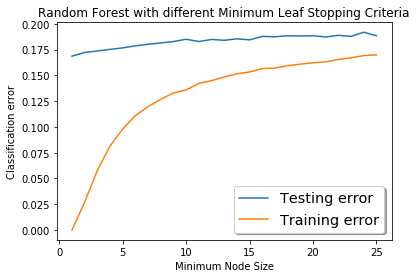

Test error minimized at selected minimum node size = 1


In [7]:
percentile_range = [i for i in range(1,26)]
plt.figure()
plt.plot(percentile_range, random_forest_test_errors, label='Testing error')
plt.plot(percentile_range, random_forest_training_errors, label='Training error')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Random Forest with different Minimum Leaf Stopping Criteria')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

val, idx = min((val, idx) for (idx, val) in enumerate(random_forest_test_errors))
print('Test error minimized at selected minimum node size = %d'%(percentile_range[idx]))

In [9]:
decision_tree_training_error = [0.2158, 0.20806666666666662, 0.2064666666666667, 0.20506666666666662, 0.2029333333333333, 0.20246666666666668, 0.20240000000000002, 0.2019333333333333, 0.20146666666666668, 0.2009333333333333]
decision_tree_test_error = [0.23660000000000003, 0.235, 0.23740000000000006, 0.24019999999999997, 0.24460000000000004, 0.24660000000000004, 0.24660000000000004, 0.24539999999999995, 0.24580000000000002, 0.24460000000000004]

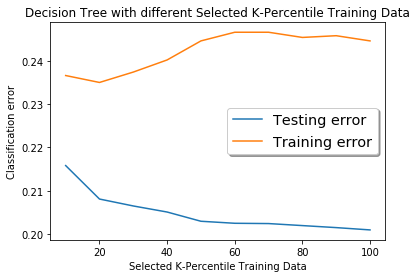

Test error minimized at selected K-percentile training data value of = 20


In [11]:
percentile_range = [i for i in range(10,110,10)]
plt.figure()
plt.plot(percentile_range, decision_tree_training_error, label='Testing error')
plt.plot(percentile_range, decision_tree_test_error, label='Training error')
plt.xlabel('Selected K-Percentile Training Data')
plt.ylabel('Classification error')
plt.title('Decision Tree with different Selected K-Percentile Training Data')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

val, idx = min((val, idx) for (idx, val) in enumerate(decision_tree_test_error))
print('Test error minimized at selected K-percentile training data value of = %d'%(percentile_range[idx]))